In [17]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

name='177_right.jpeg'
image = cv.imread(name)
grayscale = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
ret,thresholded = cv.threshold(grayscale, 0, 255, cv.THRESH_OTSU)
bbox = cv.boundingRect(thresholded)
x, y, w, h = bbox
foreground = image[y:y+h, x:x+w]
resized = cv.resize(foreground, (512,512),interpolation = cv.INTER_AREA)
cv.imwrite(name,resized)

In [18]:
def checkYellow(img):
    (_, G, R ) = cv.split(img)
    clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

    R = clahe.apply(R)
    G = clahe.apply(G)

    R = R.flatten()
    lenR = len(R[R >150])
    G = G.flatten()
    lenG = len(G[G >100])
    print(lenG,lenR)

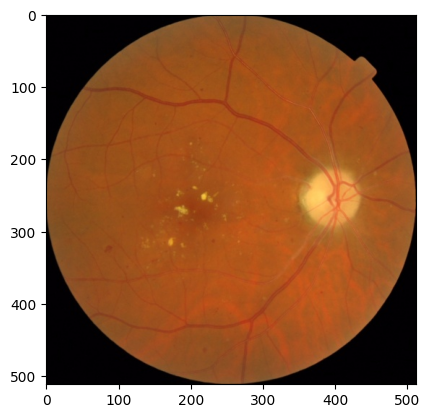

In [82]:
img = cv.imread('original1.jpg')
img_convert = cv.cvtColor(img, cv.COLOR_BGR2RGB) #defining image to experiment with number of clusters
plt.imshow(img_convert)
# checkYellow(img)

In [83]:

img = img[:,:,1]
cv.imwrite('green.jpg',img)

img_width,img_height =img.shape

In [84]:
Z = img.reshape((-1))
# convert to np.float32
Z = np.float32(Z)

# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)


## Optic disk removal

In [85]:

K = 8
ret,label,center=cv.kmeans(Z,K,None,criteria,10,cv.KMEANS_PP_CENTERS )
# Now convert back into uint8, and make original image
center = np.uint8(center)
flat = label.flatten()
index = np.argmax(center)
minindex = np.argmin(center)
super_threshold_indices = flat != index
flat[super_threshold_indices] = minindex
res = center[flat]
res2 = res.reshape((img.shape))


ret,thresholded = cv.threshold(res2, 0, 255, cv.THRESH_OTSU)
# Taking a matrix of size 5 as the kernel
kernel = np.ones((10, 10), np.uint8)
# dilate the thresholed image
img_dilation = cv.dilate(thresholded, kernel, iterations=1)
cv.imwrite(str(K)+'.jpg',img_dilation)


contours , hierarchy = cv.findContours(img_dilation, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)
# find biggest contour
c = max(contours, key = cv.contourArea)
bbox = cv.boundingRect(c)
x, y, w, h = bbox
print(bbox)

xoffset = int(img_width/30)
yoffset = int(img_height/30)


img[y - yoffset : y + h + 2*yoffset, x - xoffset : x + w + 2*xoffset] = 0
cv.imwrite('ODremoved.jpeg', img )

# cv.imwrite('3cropped.jpeg', cv.bitwise_and(img, cv.bitwise_not(img_dilation)) )

(351, 220, 53, 64)


True

## Exudate extraction

In [86]:
img = cv.imread('ODremoved.jpeg')
img_convert = cv.cvtColor(img, cv.COLOR_BGR2RGB) #defining image to experiment with number of clusters
img = img[:,:,1]
Z = img.reshape((-1))
# convert to np.float32
Z = np.float32(Z)

In [87]:

kernel = np.ones((4, 4), np.uint8)
# dilate the thresholed image
img_dilation = cv.dilate(img, kernel, iterations=1)


radius = img_height//2 - 30
# draw filled circle in white on black background as mask
mask = np.zeros_like(img)
mask = cv.circle(mask, (img_width//2,img_height//2), radius, (255,255,255), -1)

# apply mask to image
retina_edge_removed = cv.bitwise_and(img_dilation, mask)
cv.imwrite('retina_edge_removed.jpeg', retina_edge_removed )

Z = retina_edge_removed.reshape((-1))
# convert to np.float32
Z = np.float32(Z)

In [88]:
for x in range(4,13):

    K = x
    ret,label,center=cv.kmeans(Z,K,None,criteria,10,cv.KMEANS_PP_CENTERS )
    # Now convert back into uint8, and make original image
    center = np.uint8(center)
    flat = label.flatten()
    index = np.argmax(center)
    minindex = np.argmin(center)
    super_threshold_indices = flat != index
    flat[super_threshold_indices] = minindex
    res = center[flat]
    res2 = res.reshape((img.shape))
    cv.imwrite(str(K)+'.jpg',res2)
#cv.imshow('res2',res2)
#cv.waitKey(0)
#cv.destroyAllWindows()

In [89]:
K = 25
ret,label,center=cv.kmeans(Z,K,None,criteria,10,cv.KMEANS_RANDOM_CENTERS )
# Now convert back into uint8, and make original image
center = np.uint8(center)
flat = label.flatten()

c = center.flatten()
sortedIndexes = sorted(range(len(c)), key = lambda sub: c[sub],reverse=True)

# index = np.argmax(center)
index = sortedIndexes[2]


minindex = np.argmin(center)


super_threshold_indices = flat != index
flat[super_threshold_indices] = minindex
res = center[flat]
res2 = res.reshape((img.shape))
cv.imwrite(str(K)+'.jpg',res2)

True

In [90]:
center

array([[ 80],
       [ 93],
       [ 88],
       [ 73],
       [117],
       [  5],
       [  2],
       [ 66],
       [  1],
       [101],
       [176],
       [138],
       [ 83],
       [  0],
       [  0],
       [  0],
       [  0],
       [  3],
       [  0],
       [195],
       [  0],
       [  0],
       [  0],
       [  0],
       [158]], dtype=uint8)